In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('./dataset/astana_apartments.csv')
df

,id,listing_id,url,source,residential_complex_id,residential_complex_name,rooms,area,living_area,kitchen_area,...,internet,documents,offer_type,address,district,latitude,longitude,parsed_at,updated_at,is_active
0,1,691048362,https://krisha.kz/a/show/691048362?srchid=019b...,krisha.kz,NaN,Respublika,2,72.50,NaN,NaN,...,NaN,NaN,NaN,Е-36 5,Нура р-н,51.128205,71.385412,2026-01-03T20:50:46.421397,NaN,1
1,2,1004599137,https://krisha.kz/a/show/1004599137?srchid=019...,krisha.kz,NaN,Family Town,3,89.30,NaN,11.80,...,NaN,NaN,NaN,Е652 6,Есильский р-н,51.059035,71.420952,2026-01-03T20:50:52.735945,NaN,1
2,3,761512600,https://krisha.kz/a/show/761512600?srchid=019b...,krisha.kz,NaN,Свечки,2,72.10,NaN,NaN,...,NaN,NaN,NaN,Богенбай батыра 30,Сарыарка р-н,51.189164,71.356273,2026-01-03T20:51:01.431439,NaN,1
3,4,1007029481,https://krisha.kz/a/show/1007029481?srchid=019...,krisha.kz,NaN,Sezim Qala.Baqyt,4,106.77,NaN,11.13,...,NaN,NaN,NaN,Туран 55/12,Нура р-н,51.114484,71.393405,2026-01-03T20:51:09.278359,NaN,1
4,5,697845378,https://krisha.kz/a/show/697845378?srchid=019b...,krisha.kz,NaN,Boston Comfort House,2,39.00,NaN,NaN,...,NaN,NaN,NaN,"мкр Уркер, Кургальжинское шоссе 108",Нура р-н,51.121439,71.283095,2026-01-03T20:51:19.144336,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18383,18384,1006690128,https://krisha.kz/a/show/1006690128?srchid=019...,krisha.kz,NaN,Яссауи,2,65.40,NaN,10.60,...,NaN,NaN,NaN,Кабанбай батыр 63,Нура р-н,51.074051,71.395826,2026-01-06T00:15:50.724620,NaN,1
18384,18385,699828528,https://krisha.kz/a/show/699828528?srchid=019b...,krisha.kz,NaN,Гималаи,2,39.00,NaN,NaN,...,NaN,NaN,NaN,Нажмиденова 15,Алматы р-н,51.113736,71.512341,2026-01-06T00:15:59.138597,NaN,1
18385,18386,1008250460,https://krisha.kz/a/show/1008250460?srchid=019...,krisha.kz,NaN,NaN,2,69.80,NaN,9.20,...,NaN,NaN,NaN,омарова 23/1,Нура р-н,51.140036,71.369173,2026-01-06T00:16:02.112484,NaN,1
18386,18387,1008289184,https://krisha.kz/a/show/1008289184,krisha.kz,NaN,NaN,3,75.00,NaN,NaN,...,NaN,NaN,NaN,Момышулы 4,Алматы р-н,51.137656,71.470322,2026-01-06T00:16:05.207213,NaN,1


In [134]:
df = df.drop(columns=['id', 'listing_id', 'url', 'source', 'residential_complex_name','residential_complex_id', 'is_active', 'updated_at', 'parsed_at', 'offer_type', 'documents', 'internet', 'heating', 'building_series', 'price_local', 'address'])

In [135]:
df

,rooms,area,living_area,kitchen_area,floor,total_floors,price_usd,price_per_m2,house_type,year_built,...,condition,bathroom,balcony,parking,furniture,floor_type,security,district,latitude,longitude
0,2,72.50,NaN,NaN,NaN,NaN,75646,1043,монолитный,2023,...,NaN,совмещенный,NaN,NaN,NaN,NaN,NaN,Нура р-н,51.128205,71.385412
1,3,89.30,NaN,11.80,4.0,5.0,88424,990,кирпичный,2014,...,NaN,2 с/у и более,балкон и лоджия,паркинг,полностью,ламинат,NaN,Есильский р-н,51.059035,71.420952
2,2,72.10,NaN,NaN,NaN,NaN,56984,790,монолитный,1998,...,"не новый, но аккуратный ремонт",2 с/у и более,лоджия,NaN,полностью,ламинат,"видеонаблюдение, видеодомофон, консьерж",Сарыарка р-н,51.189164,71.356273
3,4,106.77,NaN,11.13,8.0,9.0,149338,1398,монолитный,2023,...,NaN,NaN,NaN,паркинг,NaN,NaN,NaN,Нура р-н,51.114484,71.393405
4,2,39.00,NaN,NaN,2.0,2.0,27509,705,кирпичный,2021,...,NaN,совмещенный,лоджия,паркинг,NaN,ламинат,"охрана, домофон, кодовый замок",Нура р-н,51.121439,71.283095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18383,2,65.40,NaN,10.60,7.0,12.0,92354,1412,монолитный,2025,...,свежий ремонт,2 с/у и более,балкон и лоджия,паркинг,полностью,ламинат,"охрана, домофон, кодовый замок, видеонаблюдени...",Нура р-н,51.074051,71.395826
18384,2,39.00,NaN,NaN,2.0,12.0,60914,1561,кирпичный,2024,...,свежий ремонт,совмещенный,балкон,паркинг,полностью,ламинат,NaN,Алматы р-н,51.113736,71.512341
18385,2,69.80,NaN,9.20,2.0,9.0,72704,1041,кирпичный,2020,...,свежий ремонт,раздельный,лоджия,рядом охраняемая стоянка,полностью,ламинат,"домофон, видеонаблюдение, видеодомофон",Нура р-н,51.140036,71.369173
18386,3,75.00,NaN,NaN,7.0,9.0,59932,799,панельный,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Алматы р-н,51.137656,71.470322


In [136]:
df['balcony'].unique()

array([nan, 'балкон и лоджия', 'лоджия', 'балкон',
       'несколько балконов или лоджий'], dtype=object)

In [137]:
df['null_counts'] = df.isna().sum(axis=1)

In [138]:
df

,rooms,area,living_area,kitchen_area,floor,total_floors,price_usd,price_per_m2,house_type,year_built,...,bathroom,balcony,parking,furniture,floor_type,security,district,latitude,longitude,null_counts
0,2,72.50,NaN,NaN,NaN,NaN,75646,1043,монолитный,2023,...,совмещенный,NaN,NaN,NaN,NaN,NaN,Нура р-н,51.128205,71.385412,11
1,3,89.30,NaN,11.80,4.0,5.0,88424,990,кирпичный,2014,...,2 с/у и более,балкон и лоджия,паркинг,полностью,ламинат,NaN,Есильский р-н,51.059035,71.420952,3
2,2,72.10,NaN,NaN,NaN,NaN,56984,790,монолитный,1998,...,2 с/у и более,лоджия,NaN,полностью,ламинат,"видеонаблюдение, видеодомофон, консьерж",Сарыарка р-н,51.189164,71.356273,5
3,4,106.77,NaN,11.13,8.0,9.0,149338,1398,монолитный,2023,...,NaN,NaN,паркинг,NaN,NaN,NaN,Нура р-н,51.114484,71.393405,7
4,2,39.00,NaN,NaN,2.0,2.0,27509,705,кирпичный,2021,...,совмещенный,лоджия,паркинг,NaN,ламинат,"охрана, домофон, кодовый замок",Нура р-н,51.121439,71.283095,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18383,2,65.40,NaN,10.60,7.0,12.0,92354,1412,монолитный,2025,...,2 с/у и более,балкон и лоджия,паркинг,полностью,ламинат,"охрана, домофон, кодовый замок, видеонаблюдени...",Нура р-н,51.074051,71.395826,1
18384,2,39.00,NaN,NaN,2.0,12.0,60914,1561,кирпичный,2024,...,совмещенный,балкон,паркинг,полностью,ламинат,NaN,Алматы р-н,51.113736,71.512341,3
18385,2,69.80,NaN,9.20,2.0,9.0,72704,1041,кирпичный,2020,...,раздельный,лоджия,рядом охраняемая стоянка,полностью,ламинат,"домофон, видеонаблюдение, видеодомофон",Нура р-н,51.140036,71.369173,1
18386,3,75.00,NaN,NaN,7.0,9.0,59932,799,панельный,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,Алматы р-н,51.137656,71.470322,10


In [139]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.7)
mask_unknown = df['ceiling_height'].isna()
df.loc[mask_unknown, 'ceiling_height'] = df.loc[mask_unknown].apply(
    lambda row: 3 if (row['price_per_m2'] > 1300) else 2.7,
    axis=1
)

In [140]:
df = df[df['null_counts'] <= 9]
df = df[df['area'] < 150]
df = df[df['price_per_m2'] < 3500]
df = df[df['ceiling_height'] < 5]

In [141]:
df

,rooms,area,living_area,kitchen_area,floor,total_floors,price_usd,price_per_m2,house_type,year_built,...,bathroom,balcony,parking,furniture,floor_type,security,district,latitude,longitude,null_counts
1,3,89.30,NaN,11.80,4.0,5.0,88424,990,кирпичный,2014,...,2 с/у и более,балкон и лоджия,паркинг,полностью,ламинат,NaN,Есильский р-н,51.059035,71.420952,3
2,2,72.10,NaN,NaN,NaN,NaN,56984,790,монолитный,1998,...,2 с/у и более,лоджия,NaN,полностью,ламинат,"видеонаблюдение, видеодомофон, консьерж",Сарыарка р-н,51.189164,71.356273,5
3,4,106.77,NaN,11.13,8.0,9.0,149338,1398,монолитный,2023,...,NaN,NaN,паркинг,NaN,NaN,NaN,Нура р-н,51.114484,71.393405,7
4,2,39.00,NaN,NaN,2.0,2.0,27509,705,кирпичный,2021,...,совмещенный,лоджия,паркинг,NaN,ламинат,"охрана, домофон, кодовый замок",Нура р-н,51.121439,71.283095,4
5,2,39.00,NaN,20.00,1.0,8.0,45587,1168,кирпичный,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,Сарайшык р-н,51.122232,71.500695,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18382,5,131.00,NaN,NaN,2.0,9.0,204358,1559,кирпичный,2022,...,NaN,NaN,паркинг,NaN,NaN,NaN,Есильский р-н,51.109052,71.444685,8
18383,2,65.40,NaN,10.60,7.0,12.0,92354,1412,монолитный,2025,...,2 с/у и более,балкон и лоджия,паркинг,полностью,ламинат,"охрана, домофон, кодовый замок, видеонаблюдени...",Нура р-н,51.074051,71.395826,1
18384,2,39.00,NaN,NaN,2.0,12.0,60914,1561,кирпичный,2024,...,совмещенный,балкон,паркинг,полностью,ламинат,NaN,Алматы р-н,51.113736,71.512341,3
18385,2,69.80,NaN,9.20,2.0,9.0,72704,1041,кирпичный,2020,...,раздельный,лоджия,рядом охраняемая стоянка,полностью,ламинат,"домофон, видеонаблюдение, видеодомофон",Нура р-н,51.140036,71.369173,1


In [142]:
df['security'] = df['security'].fillna('')

df['has_window_grills'] = df['security'].str.contains('решетки на окнах', case=False, na=False).astype(int)

high_security_keywords = 'охрана|сигнализация|консьерж'

df['security_high'] = df['security'].str.contains(high_security_keywords, case=False).astype(int)

df.drop(columns=['security'], inplace=True)

print(df['security_high'].value_counts())
print(df['has_window_grills'].value_counts())

security_high
0    12641
1     2915
Name: count, dtype: int64
has_window_grills
0    14871
1      685
Name: count, dtype: int64


In [143]:
df

,rooms,area,living_area,kitchen_area,floor,total_floors,price_usd,price_per_m2,house_type,year_built,...,balcony,parking,furniture,floor_type,district,latitude,longitude,null_counts,has_window_grills,security_high
1,3,89.30,NaN,11.80,4.0,5.0,88424,990,кирпичный,2014,...,балкон и лоджия,паркинг,полностью,ламинат,Есильский р-н,51.059035,71.420952,3,0,0
2,2,72.10,NaN,NaN,NaN,NaN,56984,790,монолитный,1998,...,лоджия,NaN,полностью,ламинат,Сарыарка р-н,51.189164,71.356273,5,0,1
3,4,106.77,NaN,11.13,8.0,9.0,149338,1398,монолитный,2023,...,NaN,паркинг,NaN,NaN,Нура р-н,51.114484,71.393405,7,0,0
4,2,39.00,NaN,NaN,2.0,2.0,27509,705,кирпичный,2021,...,лоджия,паркинг,NaN,ламинат,Нура р-н,51.121439,71.283095,4,0,1
5,2,39.00,NaN,20.00,1.0,8.0,45587,1168,кирпичный,2022,...,NaN,NaN,NaN,NaN,Сарайшык р-н,51.122232,71.500695,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18382,5,131.00,NaN,NaN,2.0,9.0,204358,1559,кирпичный,2022,...,NaN,паркинг,NaN,NaN,Есильский р-н,51.109052,71.444685,8,0,0
18383,2,65.40,NaN,10.60,7.0,12.0,92354,1412,монолитный,2025,...,балкон и лоджия,паркинг,полностью,ламинат,Нура р-н,51.074051,71.395826,1,0,1
18384,2,39.00,NaN,NaN,2.0,12.0,60914,1561,кирпичный,2024,...,балкон,паркинг,полностью,ламинат,Алматы р-н,51.113736,71.512341,3,0,0
18385,2,69.80,NaN,9.20,2.0,9.0,72704,1041,кирпичный,2020,...,лоджия,рядом охраняемая стоянка,полностью,ламинат,Нура р-н,51.140036,71.369173,1,0,0


In [144]:
living_ratio_mean = (
    df.loc[df['living_area'].notna() & df['area'].notna(), 'living_area']
    / df.loc[df['living_area'].notna() & df['area'].notna(), 'area']
).mean()
print(living_ratio_mean)

# 2️⃣ Средний процент кухни
kitchen_ratio_mean = (
    df.loc[df['kitchen_area'].notna() & df['area'].notna(), 'kitchen_area']
    / df.loc[df['kitchen_area'].notna() & df['area'].notna(), 'area']
).mean()
print(kitchen_ratio_mean)

# 3️⃣ Заполнение NaN
df.loc[df['living_area'].isna(), 'living_area'] = (
    df.loc[df['living_area'].isna(), 'area'] * living_ratio_mean
)

df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = (
    df.loc[df['kitchen_area'].isna(), 'area'] * kitchen_ratio_mean
)

0.7129921116899252
0.2042886416492587


In [145]:
kitchen_mask = (
    (df['kitchen_area'] > df['area']) |
    ((df['kitchen_area'] / df['area']) > 0.35)
)

df.loc[kitchen_mask, 'kitchen_area'] = df.loc[kitchen_mask, 'area'] * kitchen_ratio_mean


# 🔹 Жилая площадь
living_mask = (
    (df['living_area'] > df['area']) |
    ((df['living_area'] / df['area']) > 0.95)
)

df.loc[living_mask, 'living_area'] = df.loc[living_mask, 'area'] * living_ratio_mean

In [146]:
df

,rooms,area,living_area,kitchen_area,floor,total_floors,price_usd,price_per_m2,house_type,year_built,...,balcony,parking,furniture,floor_type,district,latitude,longitude,null_counts,has_window_grills,security_high
1,3,89.30,63.670196,11.800000,4.0,5.0,88424,990,кирпичный,2014,...,балкон и лоджия,паркинг,полностью,ламинат,Есильский р-н,51.059035,71.420952,3,0,0
2,2,72.10,51.406731,14.729211,NaN,NaN,56984,790,монолитный,1998,...,лоджия,NaN,полностью,ламинат,Сарыарка р-н,51.189164,71.356273,5,0,1
3,4,106.77,76.126168,11.130000,8.0,9.0,149338,1398,монолитный,2023,...,NaN,паркинг,NaN,NaN,Нура р-н,51.114484,71.393405,7,0,0
4,2,39.00,27.806692,7.967257,2.0,2.0,27509,705,кирпичный,2021,...,лоджия,паркинг,NaN,ламинат,Нура р-н,51.121439,71.283095,4,0,1
5,2,39.00,27.806692,7.967257,1.0,8.0,45587,1168,кирпичный,2022,...,NaN,NaN,NaN,NaN,Сарайшык р-н,51.122232,71.500695,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18382,5,131.00,93.401967,26.761812,2.0,9.0,204358,1559,кирпичный,2022,...,NaN,паркинг,NaN,NaN,Есильский р-н,51.109052,71.444685,8,0,0
18383,2,65.40,46.629684,10.600000,7.0,12.0,92354,1412,монолитный,2025,...,балкон и лоджия,паркинг,полностью,ламинат,Нура р-н,51.074051,71.395826,1,0,1
18384,2,39.00,27.806692,7.967257,2.0,12.0,60914,1561,кирпичный,2024,...,балкон,паркинг,полностью,ламинат,Алматы р-н,51.113736,71.512341,3,0,0
18385,2,69.80,49.766849,9.200000,2.0,9.0,72704,1041,кирпичный,2020,...,лоджия,рядом охраняемая стоянка,полностью,ламинат,Нура р-н,51.140036,71.369173,1,0,0


In [147]:
df['floor'].isna().value_counts()
df['total_floors'].isna().value_counts()

total_floors
False    15129
True       427
Name: count, dtype: int64

In [148]:
df['floor'].isna().value_counts()

floor
False    15129
True       427
Name: count, dtype: int64

In [149]:
df['floor'] = df['floor'].fillna(-1)
df['total_floors'] = df['total_floors'].fillna(-1)

In [150]:
mask_invalid = (
    (df['floor'] > df['total_floors']) &
    (df['total_floors'] != -1)
)
mask_invalid

1        False
2        False
3        False
4        False
5        False
         ...  
18382    False
18383    False
18384    False
18385    False
18387    False
Length: 15556, dtype: bool

In [151]:
df

,rooms,area,living_area,kitchen_area,floor,total_floors,price_usd,price_per_m2,house_type,year_built,...,balcony,parking,furniture,floor_type,district,latitude,longitude,null_counts,has_window_grills,security_high
1,3,89.30,63.670196,11.800000,4.0,5.0,88424,990,кирпичный,2014,...,балкон и лоджия,паркинг,полностью,ламинат,Есильский р-н,51.059035,71.420952,3,0,0
2,2,72.10,51.406731,14.729211,-1.0,-1.0,56984,790,монолитный,1998,...,лоджия,NaN,полностью,ламинат,Сарыарка р-н,51.189164,71.356273,5,0,1
3,4,106.77,76.126168,11.130000,8.0,9.0,149338,1398,монолитный,2023,...,NaN,паркинг,NaN,NaN,Нура р-н,51.114484,71.393405,7,0,0
4,2,39.00,27.806692,7.967257,2.0,2.0,27509,705,кирпичный,2021,...,лоджия,паркинг,NaN,ламинат,Нура р-н,51.121439,71.283095,4,0,1
5,2,39.00,27.806692,7.967257,1.0,8.0,45587,1168,кирпичный,2022,...,NaN,NaN,NaN,NaN,Сарайшык р-н,51.122232,71.500695,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18382,5,131.00,93.401967,26.761812,2.0,9.0,204358,1559,кирпичный,2022,...,NaN,паркинг,NaN,NaN,Есильский р-н,51.109052,71.444685,8,0,0
18383,2,65.40,46.629684,10.600000,7.0,12.0,92354,1412,монолитный,2025,...,балкон и лоджия,паркинг,полностью,ламинат,Нура р-н,51.074051,71.395826,1,0,1
18384,2,39.00,27.806692,7.967257,2.0,12.0,60914,1561,кирпичный,2024,...,балкон,паркинг,полностью,ламинат,Алматы р-н,51.113736,71.512341,3,0,0
18385,2,69.80,49.766849,9.200000,2.0,9.0,72704,1041,кирпичный,2020,...,лоджия,рядом охраняемая стоянка,полностью,ламинат,Нура р-н,51.140036,71.369173,1,0,0


In [152]:
df['house_type'].value_counts(normalize=True, dropna=False) * 100

house_type
монолитный    52.571355
кирпичный     38.345333
NaN            4.197737
панельный      3.548470
иной           1.337105
Name: proportion, dtype: float64

In [153]:
mapping = {
    'монолитный': 'monolithic',
    'кирпичный': 'brick',
    'панельный': 'panel',
    'иной': 'other',
    'неизвестно': 'unknown'
}

df['house_type'] = df['house_type'].map(mapping).fillna('unknown')

In [154]:
df['house_type'].value_counts(normalize=True, dropna=False) * 100

house_type
monolithic    52.571355
brick         38.345333
unknown        4.197737
panel          3.548470
other          1.337105
Name: proportion, dtype: float64

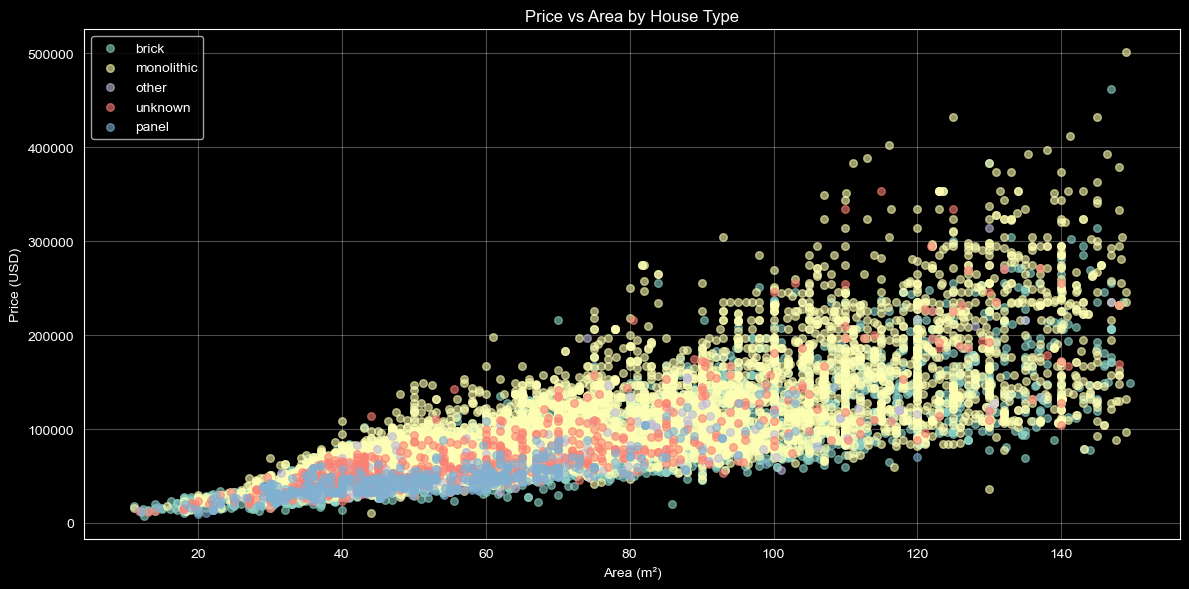

In [155]:
plt.figure(figsize=(12, 6))
for house_type in df['house_type'].unique():
    subset = df[df['house_type'] == house_type]
    plt.scatter(subset['area'], subset['price_usd'],
                label=house_type, alpha=0.6, s=30)
plt.xlabel('Area (m²)')
plt.ylabel('Price (USD)')
plt.title('Price vs Area by House Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [156]:
df['condition'].value_counts(normalize=True, dropna=False) * 100

condition
NaN                               54.319877
свежий ремонт                     23.547184
не новый, но аккуратный ремонт    12.471072
черновая отделка                   7.624068
требует ремонта                    1.562098
свободная планировка               0.475701
Name: proportion, dtype: float64

In [157]:
condition_map = {
    'свежий ремонт': 'new',
    'не новый, но аккуратный ремонт': 'good',
    'черновая отделка': 'rough',
    'требует ремонта': 'needs_repair',
    'свободная планировка': 'rough',
    'unknown': 'unknown'
}

df['condition'] = df['condition'].map(condition_map).fillna('unknown')

In [158]:
df['condition'].value_counts(normalize=True, dropna=False) * 100

condition
unknown         54.319877
new             23.547184
good            12.471072
rough            8.099769
needs_repair     1.562098
Name: proportion, dtype: float64

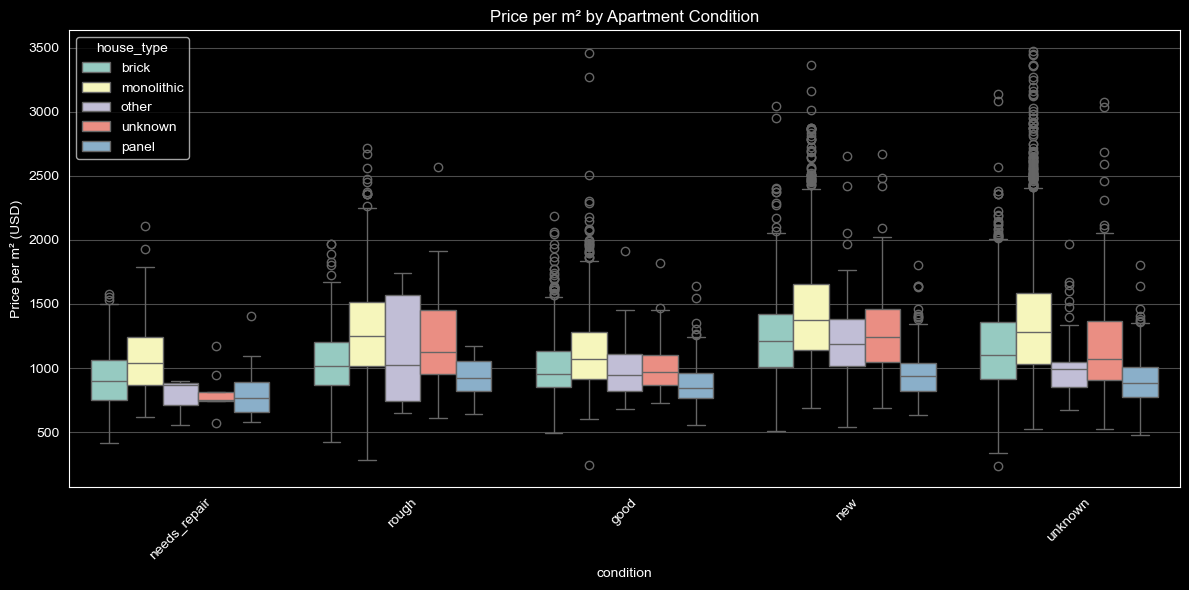

In [159]:
plt.figure(figsize=(12, 6))
condition_order = ['needs_repair', 'rough', 'good', 'new', 'unknown']
sns.boxplot(data=df, x='condition', y='price_per_m2',
            order=condition_order, palette='Set3', hue='house_type')
plt.xticks(rotation=45)
plt.title('Price per m² by Apartment Condition')
plt.ylabel('Price per m² (USD)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [160]:
df['bathroom'].value_counts(normalize=True, dropna=False) * 100

bathroom
совмещенный      36.217537
NaN              32.174081
2 с/у и более    18.809463
раздельный       12.753921
нет               0.044999
Name: proportion, dtype: float64

In [161]:
df['bathroom'] = df['bathroom'].fillna('unknown')

few_bathrooms = df[df['bathroom'] == '2 с/у и более']
area_thresh_bath = few_bathrooms['area'].mean()
price_thresh_bath = few_bathrooms['price_per_m2'].mean()

df['bathroom_count'] = 0
df.loc[df['bathroom'].isin(['совмещенный', 'раздельный']), 'bathroom_count'] = 1
df.loc[df['bathroom'] == '2 с/у и более', 'bathroom_count'] = 2
df.loc[df['bathroom'] == 'нет', 'bathroom_count'] = 0

mask_unknown = df['bathroom'] == 'unknown'
df.loc[mask_unknown, 'bathroom_count'] = df.loc[mask_unknown].apply(
    lambda row: 2 if (row['area'] > area_thresh_bath and row['price_per_m2'] > price_thresh_bath) else 1,
    axis=1
)

df['bathroom_type'] = 'unknown'
df.loc[df['bathroom'] == 'совмещенный', 'bathroom_type'] = 'combined'
df.loc[df['bathroom'] == 'раздельный', 'bathroom_type'] = 'separate'
df.loc[df['bathroom'] == '2 с/у и более', 'bathroom_type'] = 'multiple'
df.loc[df['bathroom'] == 'нет', 'bathroom_type'] = 'none'

df.drop(columns=['bathroom'], inplace=True)

In [162]:
df['bathroom_count'].value_counts(normalize=True, dropna=False) * 100

bathroom_count
1    78.902031
2    21.052970
0     0.044999
Name: proportion, dtype: float64

In [163]:
df['balcony'].value_counts(normalize=True, dropna=False) * 100

balcony
NaN                              41.970944
лоджия                           27.262792
балкон                           21.348676
несколько балконов или лоджий     5.547699
балкон и лоджия                   3.869889
Name: proportion, dtype: float64

In [164]:
df['balcony_type'] = 'unknown'
df.loc[df['balcony'] == 'балкон', 'balcony_type'] = 'balcony'
df.loc[df['balcony'] == 'лоджия', 'balcony_type'] = 'loggia'
df.loc[df['balcony'] == 'балкон и лоджия', 'balcony_type'] = 'multiple'
df.loc[df['balcony'] == 'несколько балконов или лоджий', 'balcony_type'] = 'multiple'
df.drop(columns=['balcony'], inplace=True)

In [165]:
df['balcony_type'].value_counts(normalize=True, dropna=False) * 100

balcony_type
unknown     41.970944
loggia      27.262792
balcony     21.348676
multiple     9.417588
Name: proportion, dtype: float64

In [166]:
df['parking'].value_counts(normalize=True, dropna=False) * 100

parking
паркинг                     68.905888
NaN                         24.562870
рядом охраняемая стоянка     6.447673
гараж                        0.083569
Name: proportion, dtype: float64

In [167]:
parking_map = {
    'паркинг': 'private_parking',
    'рядом охраняемая стоянка': 'public_parking',
    'гараж': 'garage'
}

df['parking'] = df['parking'].map(parking_map).fillna('no_parking')

In [168]:
df['furniture'].value_counts(normalize=True, dropna=False) * 100

furniture
NaN           44.388017
полностью     37.798920
частично      13.107483
без мебели     4.705580
Name: proportion, dtype: float64

In [169]:
furniture_map = {
    'полностью': 'fully_furnished',
    'частично': 'partially_furnished',
    'без мебели': 'unfurnished'
}

df['furniture'] = df['furniture'].map(furniture_map).fillna('unknown')

In [170]:
df['floor_type'].value_counts(normalize=True, dropna=False) * 100

floor_type
NaN          51.349961
ламинат      40.318848
линолеум      4.583440
паркет        3.201337
плитка        0.269992
дерево        0.147853
пробковый     0.115711
ковролан      0.012857
Name: proportion, dtype: float64

In [171]:
df['wooden_floor'] = df['floor_type'].apply(lambda x: 1 if x in ['дерево', 'паркет'] else 0)
df.drop(columns=['floor_type'], inplace=True)

In [172]:
df['wooden_floor'].value_counts(normalize=True, dropna=False) * 100

wooden_floor
0    96.65081
1     3.34919
Name: proportion, dtype: float64

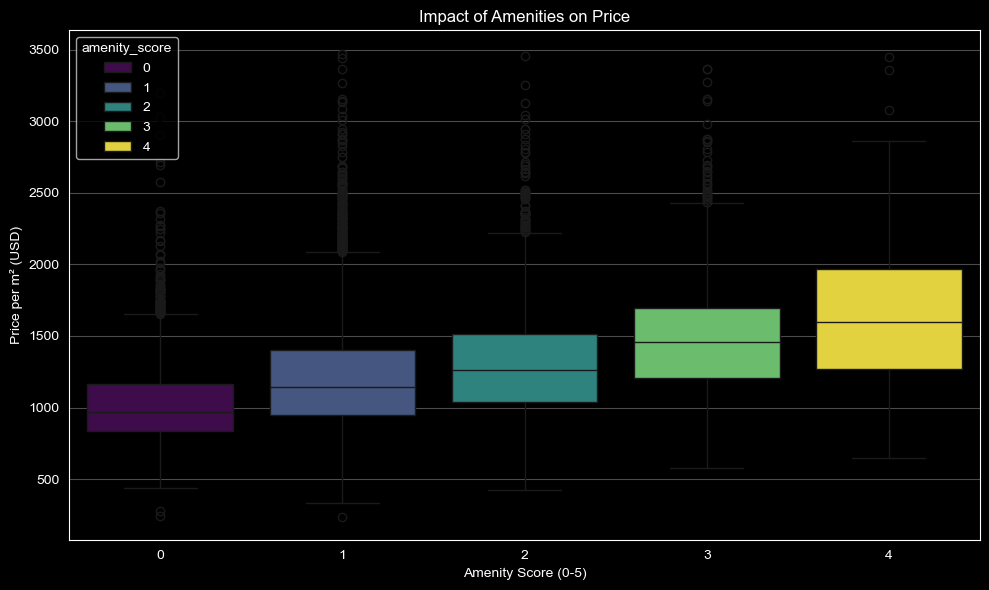

In [173]:
df_viz = df.copy()
df_viz['amenity_score'] = (
    df_viz['security_high'] +
    df_viz['wooden_floor'] +
    (df_viz['parking'] == 'private_parking').astype(int) +
    (df_viz['furniture'] == 'fully_furnished').astype(int)
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_viz, x='amenity_score', y='price_per_m2', palette='viridis', hue='amenity_score')
plt.xlabel('Amenity Score (0-5)')
plt.ylabel('Price per m² (USD)')
plt.title('Impact of Amenities on Price')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [174]:
df['district'].value_counts(normalize=True, dropna=False) * 100

district
Есильский р-н    27.924916
Нура р-н         23.662895
Алматы р-н       21.040113
Сарыарка р-н     11.384675
Сарайшык р-н      8.202623
р-н Байконур      4.654153
NaN               3.130625
Name: proportion, dtype: float64

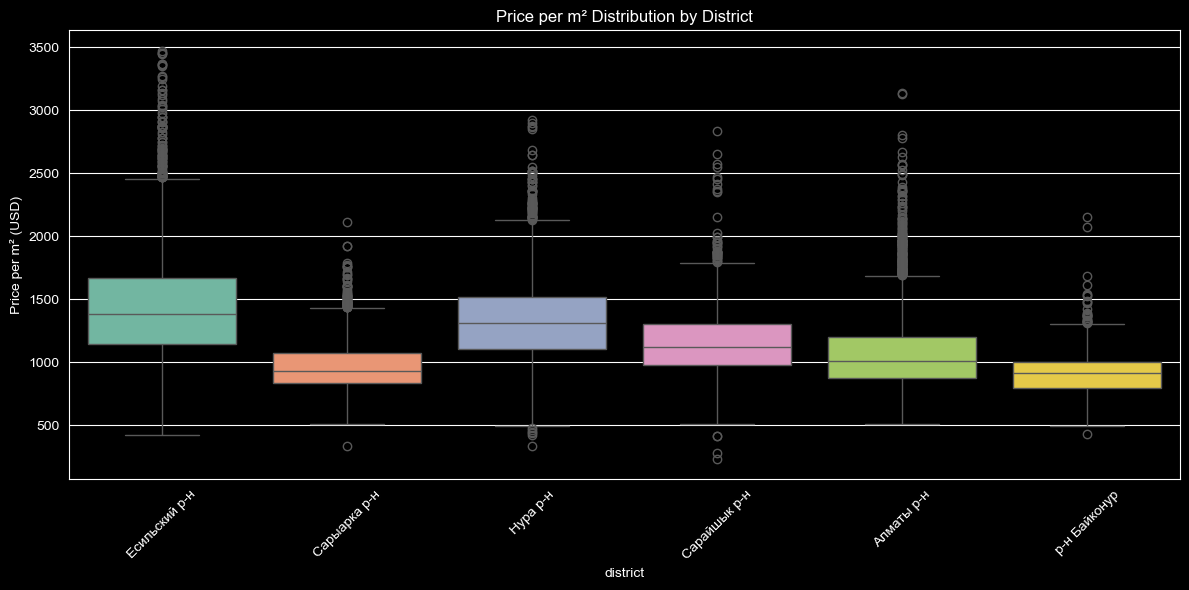

In [175]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='district', y='price_per_m2', hue='district', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.title('Price per m² Distribution by District')
plt.ylabel('Price per m² (USD)')
plt.tight_layout()
plt.show()

In [176]:
district_map = {
    'Есильский р-н': 'Yesil',
    'Нура р-н': 'Nura',
    'Алматы р-н': 'Almaty',
    'Сарыарка р-н': 'Saryarka',
    'Сарайшык р-н': 'Saryshyk',
    'р-н Байконур': 'Baikonur'
}

df['district'] = df['district'].map(district_map).fillna('unknown')

In [177]:
df['district'].value_counts(normalize=True, dropna=False) * 100

district
Yesil       27.924916
Nura        23.662895
Almaty      21.040113
Saryarka    11.384675
Saryshyk     8.202623
Baikonur     4.654153
unknown      3.130625
Name: proportion, dtype: float64

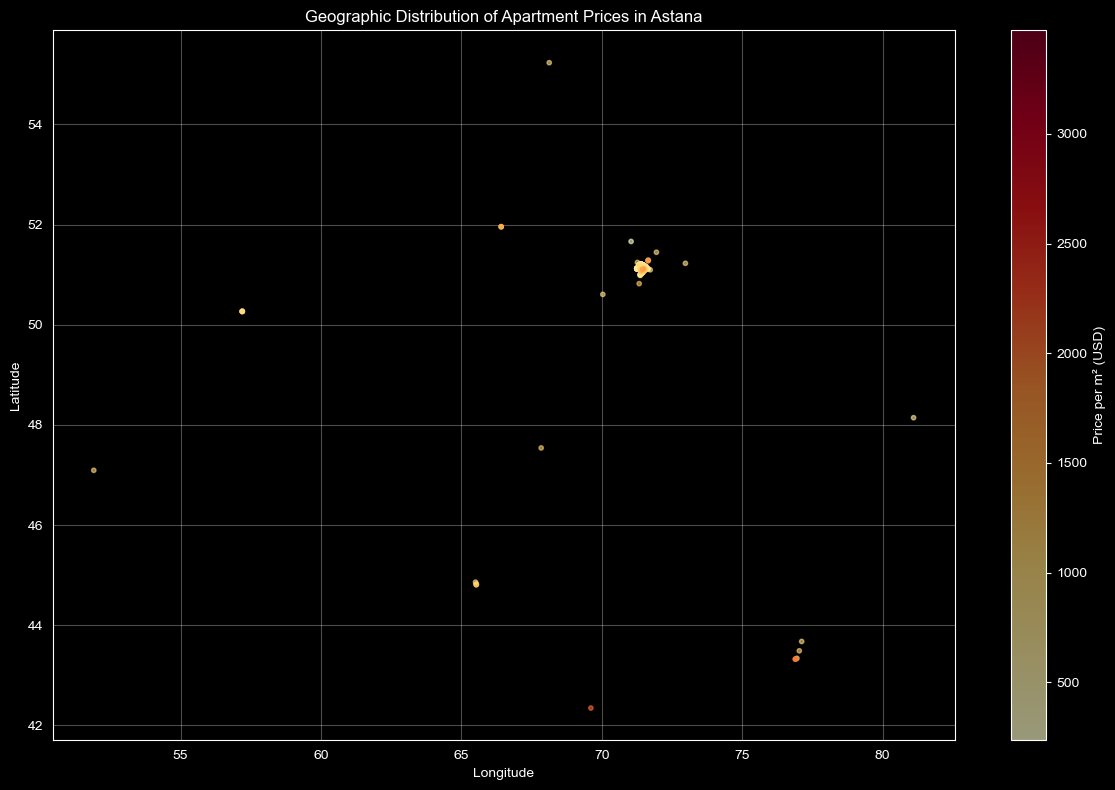

In [178]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['longitude'], df['latitude'],
                     c=df['price_per_m2'], s=10,
                     cmap='YlOrRd', alpha=0.6)
plt.colorbar(scatter, label='Price per m² (USD)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Apartment Prices in Astana')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [179]:
df['floor_relative'] = df['floor'] / df['total_floors']
df['living_ratio'] = df['living_area'] / df['area']
df['kitchen_ratio'] = df['kitchen_area'] / df['area']

In [180]:
df['building_age'] = 2026 - df['year_built']
df['building_age'] = df['building_age'].clip(lower=0)

In [181]:
df

,rooms,area,living_area,kitchen_area,floor,total_floors,price_usd,price_per_m2,house_type,year_built,...,has_window_grills,security_high,bathroom_count,bathroom_type,balcony_type,wooden_floor,floor_relative,living_ratio,kitchen_ratio,building_age
1,3,89.30,63.670196,11.800000,4.0,5.0,88424,990,brick,2014,...,0,0,2,multiple,multiple,0,0.800000,0.712992,0.132139,12
2,2,72.10,51.406731,14.729211,-1.0,-1.0,56984,790,monolithic,1998,...,0,1,2,multiple,loggia,0,1.000000,0.712992,0.204289,28
3,4,106.77,76.126168,11.130000,8.0,9.0,149338,1398,monolithic,2023,...,0,0,2,unknown,unknown,0,0.888889,0.712992,0.104243,3
4,2,39.00,27.806692,7.967257,2.0,2.0,27509,705,brick,2021,...,0,1,1,combined,loggia,0,1.000000,0.712992,0.204289,5
5,2,39.00,27.806692,7.967257,1.0,8.0,45587,1168,brick,2022,...,0,0,1,unknown,unknown,0,0.125000,0.712992,0.204289,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18382,5,131.00,93.401967,26.761812,2.0,9.0,204358,1559,brick,2022,...,0,0,2,unknown,unknown,0,0.222222,0.712992,0.204289,4
18383,2,65.40,46.629684,10.600000,7.0,12.0,92354,1412,monolithic,2025,...,0,1,2,multiple,multiple,0,0.583333,0.712992,0.162080,1
18384,2,39.00,27.806692,7.967257,2.0,12.0,60914,1561,brick,2024,...,0,0,1,combined,balcony,0,0.166667,0.712992,0.204289,2
18385,2,69.80,49.766849,9.200000,2.0,9.0,72704,1041,brick,2020,...,0,0,1,separate,loggia,0,0.222222,0.712992,0.131805,6


In [182]:
df['building_stage'] = np.where(df['year_built'] >= 2026, 1, 0)
df.drop(columns=['year_built'], inplace=True)

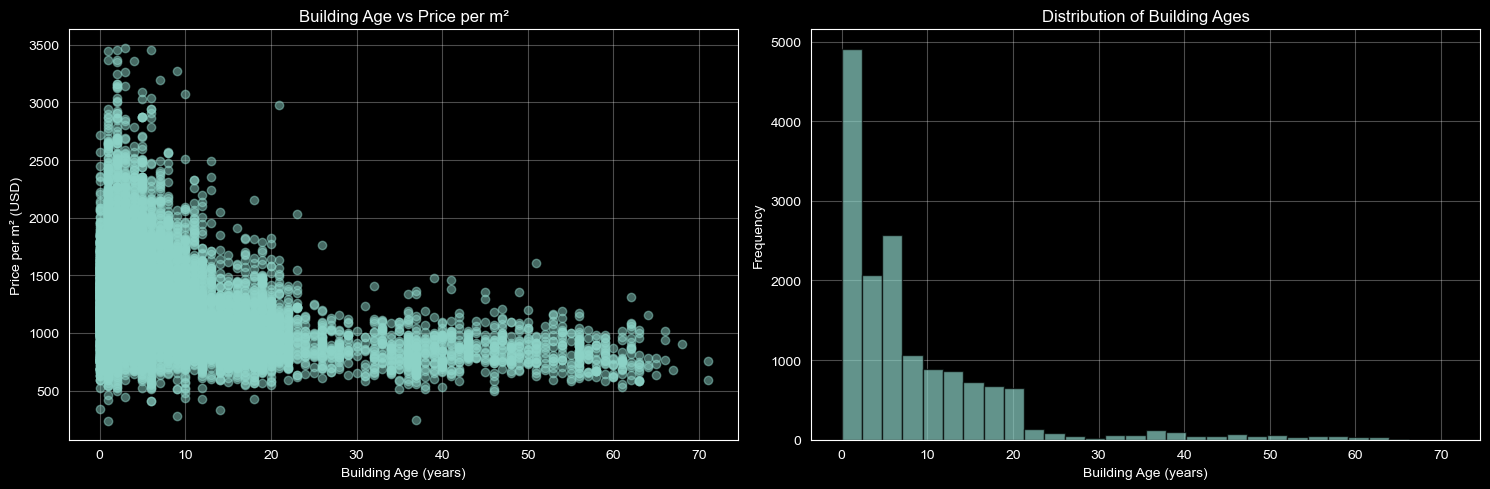

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Building age vs price
axes[0].scatter(df['building_age'], df['price_per_m2'], alpha=0.5)
axes[0].set_xlabel('Building Age (years)')
axes[0].set_ylabel('Price per m² (USD)')
axes[0].set_title('Building Age vs Price per m²')
axes[0].grid(True, alpha=0.3)

# Distribution of building ages
axes[1].hist(df['building_age'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Building Age (years)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Building Ages')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

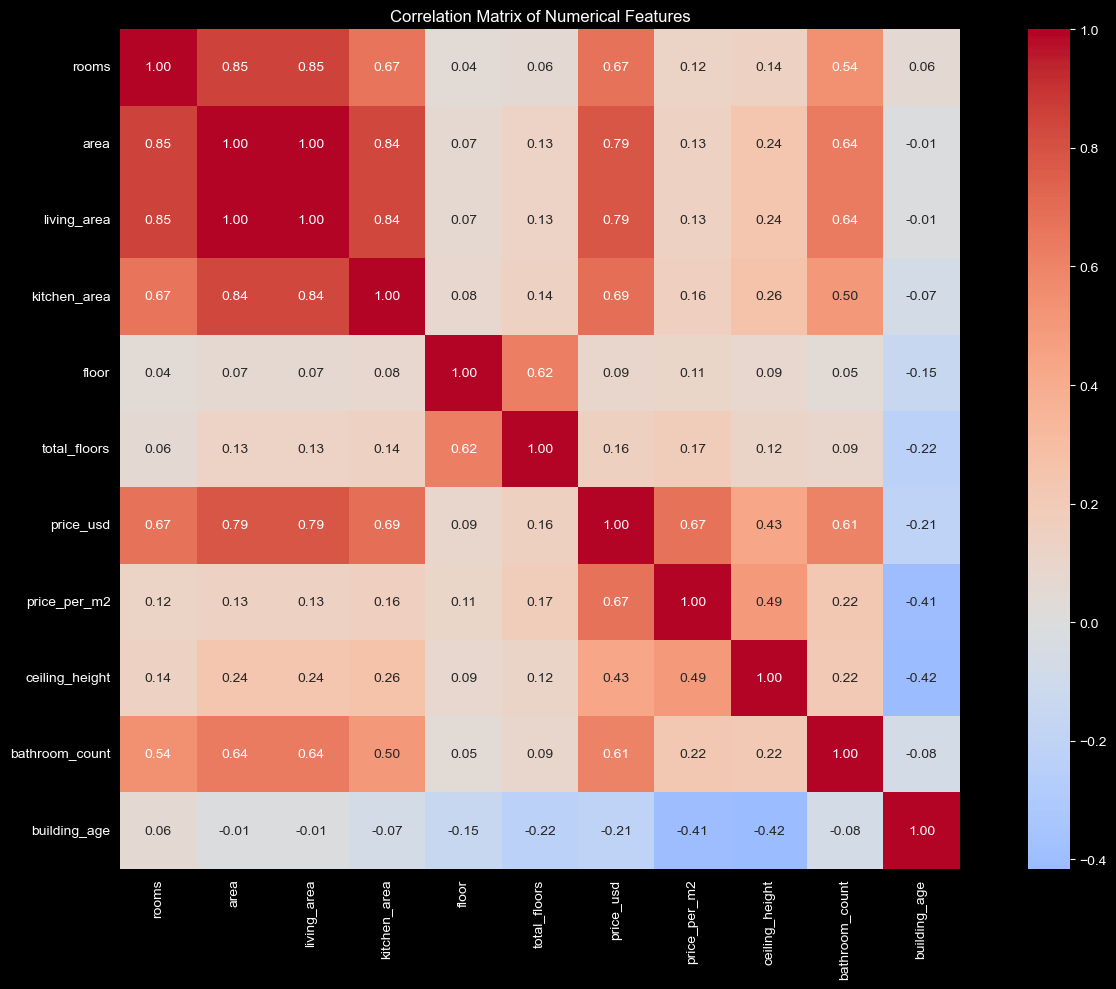

In [184]:
# Select numerical features
numerical_cols = ['rooms', 'area', 'living_area', 'kitchen_area', 'floor',
                  'total_floors', 'price_usd', 'price_per_m2', 'ceiling_height',
                  'bathroom_count', 'building_age']

plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [185]:
df.to_csv('./dataset/astana_apartments_ready.csv', index=False)